# Introduction

## Problem Statement

Credit card fraud is a significant concern for financial institutions and consumers. Fraudulent activities cause substantial losses and impact customer trust. This project aims to perform Exploratory Data Analysis (EDA) on credit card transaction data to identify patterns and anomalies that may indicate fraudulent behavior.

Students will analyze the dataset to gain insights into transaction patterns and potential factors distinguishing fraudulent transactions from legitimate ones. 

## Objective

The primary objective of this project is to analyze the credit card transaction dataset to gain insights into transaction patterns and potential factors distinguishing fraudulent transactions from legitimate ones. By understanding these patterns, we aim to:

1. Identify key features that are indicative of fraudulent transactions.
2. Visualize the distribution and relationships of features within the dataset.
3. Detect any anomalies or outliers that could suggest fraudulent activity.
4. Provide a foundation for further predictive modeling and machine learning efforts to detect fraud.

## Significance

Credit card fraud detection is crucial for maintaining the financial security of consumers and the integrity of financial institutions. By effectively identifying and mitigating fraudulent transactions, we can:

- Minimize financial losses for both consumers and institutions.
- Enhance customer trust and satisfaction.
- Improve the overall efficiency and reliability of financial systems.

## Dataset

The dataset used in this project contains credit card transactions made by European cardholders over two days in September 2013. It comprises 284,807 transactions, including both legitimate and fraudulent transactions. The dataset includes the following features:

- **Time**: The seconds elapsed between this transaction and the first transaction in the dataset.
- **V1 to V28**: The result of a PCA transformation on the original features to protect confidentiality.
- **Amount**: The transaction amount.
- **Class**: The label indicating whether the transaction is fraudulent (1) or legitimate (0).

## Approach

In this notebook, we will:
1. Load and preprocess the dataset.
2. Perform exploratory data analysis (EDA) to understand the data distribution and relationships between features.
3. Visualize the data to identify patterns and anomalies.
4. Summarize our findings and insights.

Let's begin by loading the dataset and performing some initial data exploration.

### Import libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np


### Load the dataset:

In [4]:
# Load the dataset
file_path = "/kaggle/input/creditcardfraud/creditcard.csv"
df = pd.read_csv(file_path)

### 1. How many rows and columns are in the dataset?

In [5]:
# Get the shape of the dataset
rows, columns = df.shape
print(f"The dataset contains {rows} rows and {columns} columns.")

The dataset contains 284807 rows and 31 columns.


### 2. What are the column names and their data types?

In [6]:
# Get the column names and their data types
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


### 3. Are there any missing or null values in the dataset?

In [7]:
# Check for missing or null values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


### 4. How many transactions are fraudulent, and how many are legitimate?

In [8]:
# Count the number of fraudulent and legitimate transactions
transaction_counts = df['Class'].value_counts()
print("Number of legitimate transactions:", transaction_counts[0])
print("Number of fraudulent transactions:", transaction_counts[1])

Number of legitimate transactions: 284315
Number of fraudulent transactions: 492


### 5. What percentage of transactions are fraudulent?

Percentage of fraudulent transactions: 0.17%


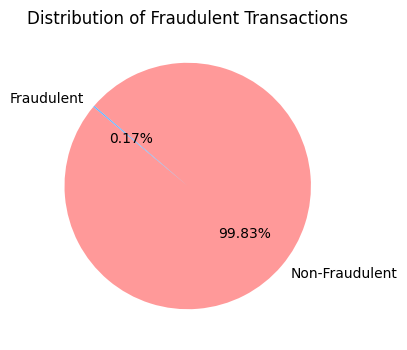

In [19]:
# Calculate the percentage of fraudulent transactions
total_transactions = len(df)
transaction_counts = df['Class'].value_counts()
fraudulent_transactions = transaction_counts[1]
non_fraudulent_transactions = transaction_counts[0]
percentage_fraudulent = (fraudulent_transactions / total_transactions) * 100
print(f"Percentage of fraudulent transactions: {percentage_fraudulent:.2f}%")

# Data for the pie chart
labels = ['Non-Fraudulent', 'Fraudulent']
sizes = [non_fraudulent_transactions, fraudulent_transactions]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode the 1st slice (i.e. 'Non-Fraudulent')

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%2.2f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Fraudulent Transactions')
plt.savefig('Distribution of Fraudulent Transactions')
plt.show()

### 6. What are the minimum, maximum, mean, and median values for numerical columns like Amount?

In [20]:
numerical_stats = df.describe()
numerical_stats

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [33]:
# Calculate descriptive statistics for the 'Amount' column
min_amount = df['Amount'].min()
max_amount = df['Amount'].max()
mean_amount = df['Amount'].mean()
median_amount = df['Amount'].median()

# Print the statistics
print(f"Minimum amount: {min_amount:.2f}")
print(f"Maximum amount: {max_amount:.2f}")
print(f"Mean amount: {mean_amount:.2f}")
print(f"Median amount: {median_amount:.2f}")

Minimum amount: 0.00
Maximum amount: 25691.16
Mean amount: 88.35
Median amount: 22.00


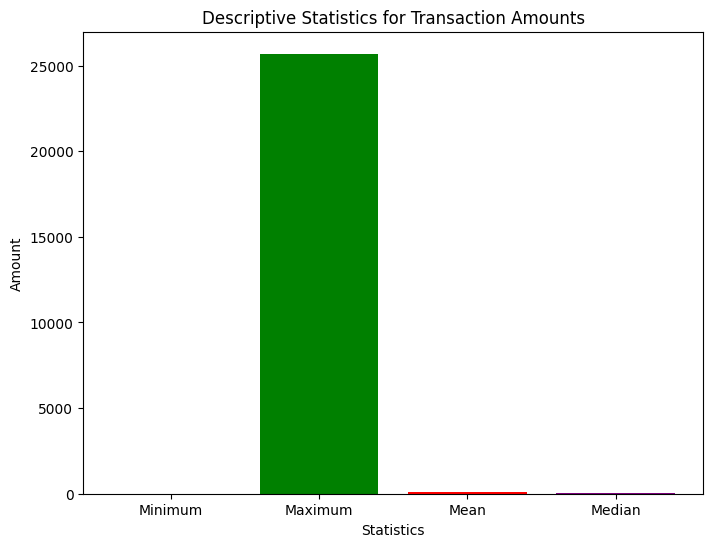

In [34]:
# Data for plotting
stats = ['Minimum', 'Maximum', 'Mean', 'Median']
values = [min_amount, max_amount, mean_amount, median_amount]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(stats, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Descriptive Statistics for Transaction Amounts')
plt.xlabel('Statistics')
plt.ylabel('Amount')
plt.show()

### 7. What is the Maximum Transaction Amount in the Dataset, and is it Fraudulent?

In [35]:
# Find the maximum transaction amount
max_amount = df['Amount'].max()
max_amount_row = df[df['Amount'] == max_amount]
is_fraudulent = max_amount_row['Class'].values[0]
print(f"The maximum transaction amount is {max_amount}, and it is {'fraudulent' if is_fraudulent else 'legitimate'}.")

The maximum transaction amount is 25691.16, and it is legitimate.


### 8. Create a Bar Chart Showing the Count of Fraudulent vs. Legitimate Transactions

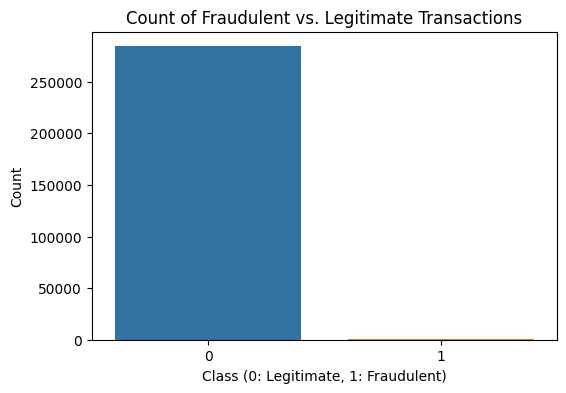

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Count of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

###  9. What does the histogram of transaction amounts look like?

### Histogram of Transaction Amounts

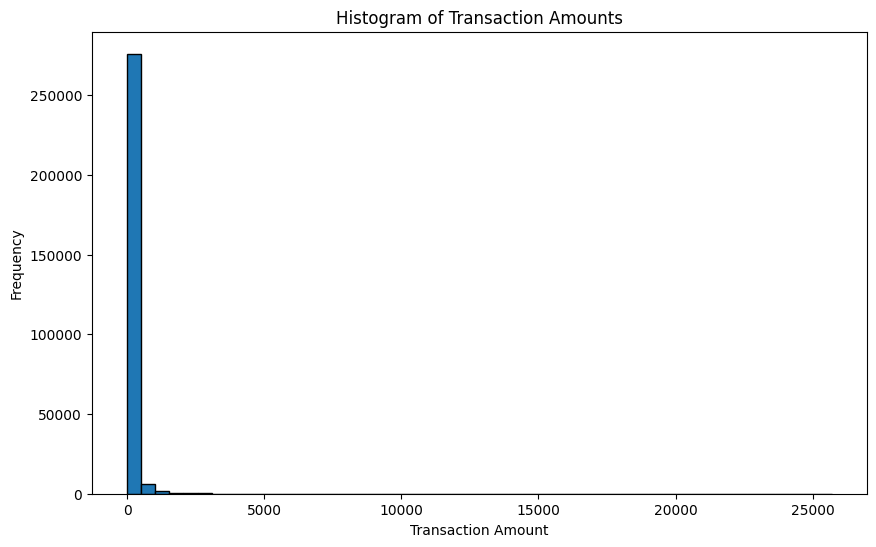

In [37]:
# Create a histogram of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(df['Amount'], bins=50, edgecolor='k')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### 11. Heatmap to Visualize the Correlation Between Numerical Features

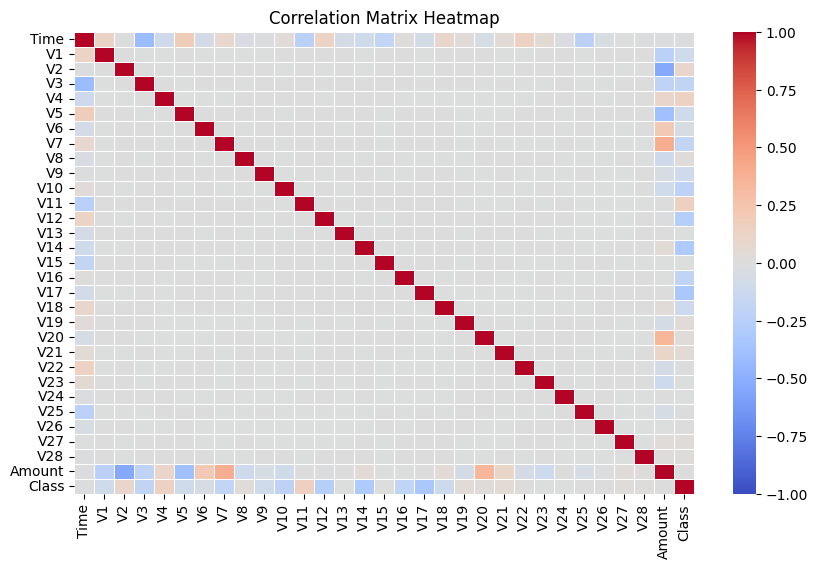

In [40]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,cmap='coolwarm',vmin=-1,vmax=1,annot=False,linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### As expected, there is no notable correlation between features **V1-V28**. There are certain correlations between some of these features and **Time** (inverse correlation with **V3**) and Amount (direct correlation with **V7** and **V20**, inverse correlation with **V1** and **V5**).

## Scatter Plot to Visualize Potential Outliers in Amount vs Time

In this section, we aim to visualize the relationship between the transaction `Amount` and `Time` to identify any potential outliers. Outliers are data points that differ significantly from other observations and can indicate unusual or fraudulent activities.

The scatter plot below maps each transaction's `Amount` against `Time`. This visualization helps us understand how transaction amounts vary over time and spot any anomalies or unusual patterns.


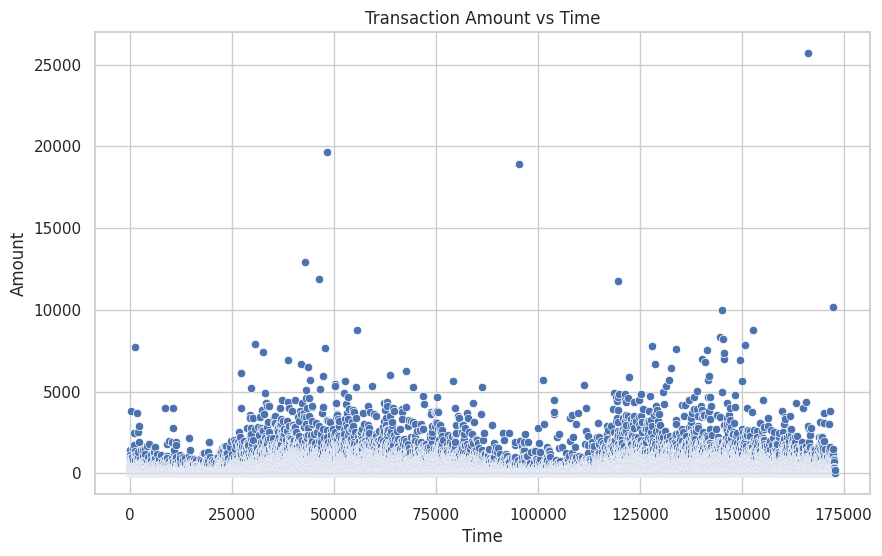

In [62]:
# Scatter plot to visualize potential outliers in Amount vs Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=df)
plt.title('Transaction Amount vs Time')
plt.show()

### Transaction Amount vs. Time Scatterplot:

#### Insight: 
The scatterplot identifies potential outliers and patterns in transaction amounts over time. Sparse regions with high amounts may indicate unusual behavior that requires further investigation​


## Ensuring No Infinite Values and Visualizing Time Distribution for Fraud and Not Fraud Transactions

In this section, we ensure there are no infinite values in the 'Time' column and then visualize the distribution of transaction times for fraudulent and non-fraudulent transactions using a Kernel Density Estimate (KDE) plot.

### Interpretation
The KDE plot helps us visualize the distribution of transaction times for both fraudulent and non-fraudulent transactions. By comparing these distributions, we can identify any patterns or anomalies that may indicate fraudulent behavior. For instance, if fraudulent transactions tend to occur at specific times, this information could be valuable for detecting and preventing fraud.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


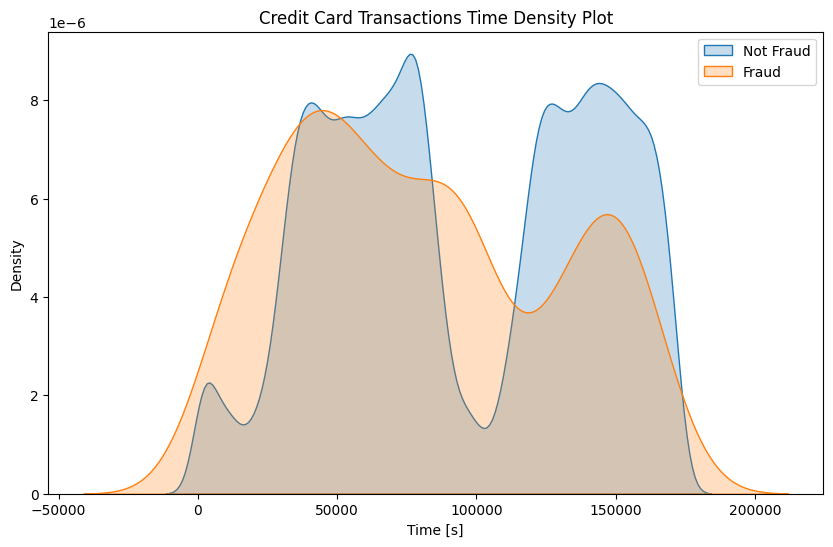

In [41]:
# Ensure there are no infinite values in the 'Time' column
df['Time'].replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Splitting the data
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

# Creating a Seaborn KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(class_0, label='Not Fraud', fill=True, common_norm=False)
sns.kdeplot(class_1, label='Fraud', fill=True, common_norm=False)

# Adding titles and labels
plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')
plt.legend()

# Display the plot
plt.show()

### Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone



### Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

# Insights from the Analysis of Fraudulent Transactions by Hour

## Analysis Overview
In this analysis, we aimed to identify the hour of the day with the most frequent fraudulent transactions. We followed these steps:

1. Loaded the dataset and preprocessed the `Time` column to extract the hour of the day.
2. Filtered the dataset to separate fraudulent transactions from non-fraudulent ones.
3. Aggregated the count of fraudulent transactions by hour.
4. Identified the hour with the highest number of fraudulent transactions.
5. Visualized the distribution of fraudulent transactions by hour using a bar plot.

## Key Findings
- **Hour with the Most Frequent Fraudulent Transactions:** The analysis revealed that the hour with the most frequent fraudulent transactions is **2:00 AM**.
- **Number of Fraudulent Transactions during this Hour:** There were **57 fraudulent transactions** recorded during this hour.



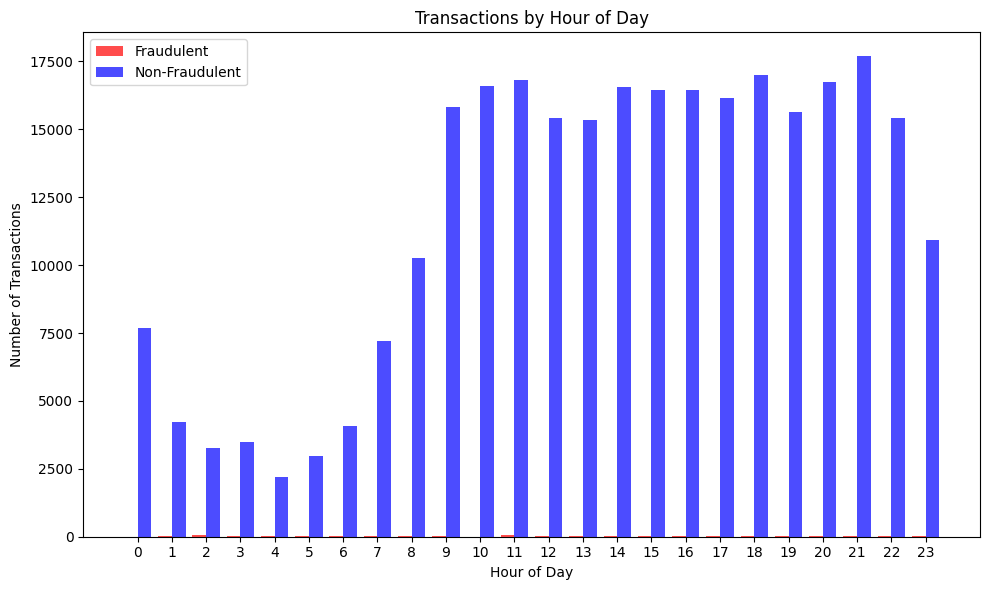

In [43]:
# Convert the 'Time' column to hours
df['transaction_hour'] = (df['Time'] // 3600) % 24

# Assuming 'Class' column indicates fraudulent transactions (1 for fraud, 0 for non-fraud)
df['is_fraudulent'] = df['Class']

# Separate the fraudulent and non-fraudulent transactions
fraudulent_df = df[df['is_fraudulent'] == 1]
non_fraudulent_df = df[df['is_fraudulent'] == 0]

# Aggregate by hour for fraudulent and non-fraudulent transactions
fraudulent_by_hour = fraudulent_df.groupby('transaction_hour').size()
non_fraudulent_by_hour = non_fraudulent_df.groupby('transaction_hour').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(fraudulent_by_hour.index - 0.2, fraudulent_by_hour.values, width=0.4, color='red', alpha=0.7, label='Fraudulent')
plt.bar(non_fraudulent_by_hour.index + 0.2, non_fraudulent_by_hour.values, width=0.4, color='blue', alpha=0.7, label='Non-Fraudulent')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Hour of Day')
plt.xticks(range(0, 24))  # Set x-ticks for hours
plt.legend()
plt.tight_layout()
plt.show()

The hour with the most frequent fraudulent transactions is: 2.0:00
Number of fraudulent transactions during this hour: 57


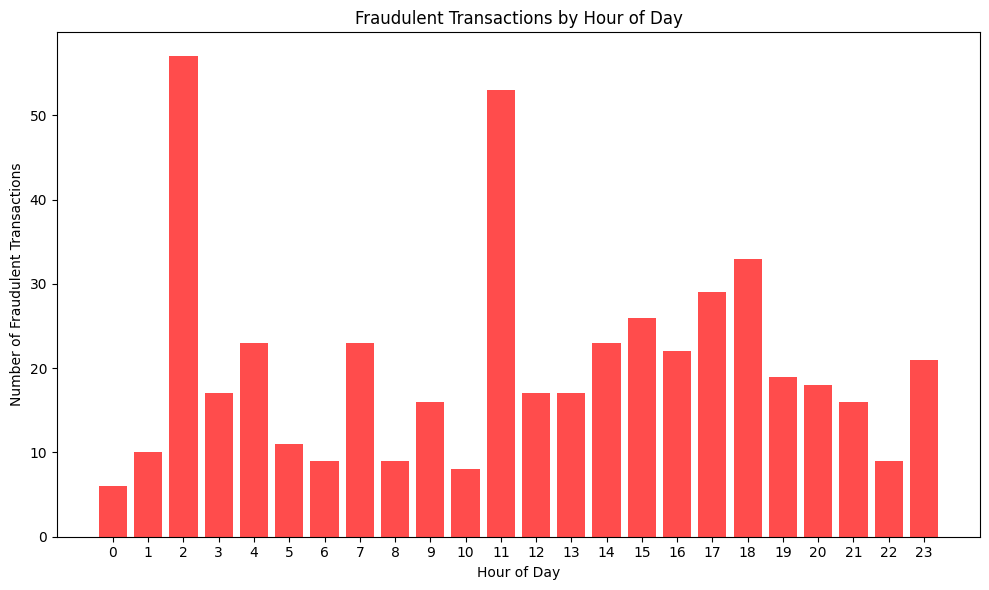

In [44]:
# Convert the 'Time' column to hours
df['transaction_hour'] = (df['Time'] // 3600) % 24

# Assuming 'Class' column indicates fraudulent transactions (1 for fraud, 0 for non-fraud)
df['is_fraudulent'] = df['Class']

# Separate the fraudulent transactions
fraudulent_df = df[df['is_fraudulent'] == 1]

# Aggregate by hour for fraudulent transactions
fraudulent_by_hour = fraudulent_df.groupby('transaction_hour').size()

# Find the hour with the most frequent fraudulent transactions
most_frequent_hour = fraudulent_by_hour.idxmax()
most_frequent_count = fraudulent_by_hour.max()

# Print the result
print(f"The hour with the most frequent fraudulent transactions is: {most_frequent_hour}:00")
print(f"Number of fraudulent transactions during this hour: {most_frequent_count}")

# Plotting the distribution of fraudulent transactions by hour
plt.figure(figsize=(10, 6))
plt.bar(fraudulent_by_hour.index, fraudulent_by_hour.values, color='red', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fraudulent Transactions by Hour of Day')
plt.xticks(range(0, 24))  # Set x-ticks for hours
plt.tight_layout()
plt.show()

## Visualization
The following bar plot visually represents the distribution of fraudulent transactions by hour of the day. The peak at 2:00 AM & 11:00 AM indicates the highest frequency of fraudulent activities during this time.This analysis highlights the importance of monitoring specific hours of the day for potential fraudulent activities. By focusing on peak hours, such as 2:00 AM, institutions can enhance their fraud detection mechanisms and prevent potential losses.

## Data Preprocessing and Calculation of Hourly Statistics

In this section, we preprocess the data by converting the `Time` column into hours, handling infinite values, and calculating various statistics for both fraudulent and non-fraudulent transactions by hour. These statistics will help us understand the temporal patterns of transaction amounts.


In [47]:
# Convert the 'Time' column to hours
df['transaction_hour'] = (df['Time'] // 3600) % 24

# Replace inf values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculate required statistics for each hour
hourly_stats = df.groupby('transaction_hour').agg({
    'Amount': ['sum', 'mean', 'min', 'max', 'median']
}).reset_index()

# Rename columns for easier access
hourly_stats.columns = ['Hour', 'Total', 'Mean', 'Min', 'Max', 'Median']

# Separate fraudulent and non-fraudulent transactions
fraudulent_df = df[df['Class'] == 1]
non_fraudulent_df = df[df['Class'] == 0]

# Calculate required statistics for fraudulent transactions
fraudulent_stats = fraudulent_df.groupby('transaction_hour').agg({
    'Amount': ['sum', 'mean', 'min', 'max', 'median']
}).reset_index()
fraudulent_stats.columns = ['Hour', 'Total', 'Mean', 'Min', 'Max', 'Median']

# Calculate required statistics for non-fraudulent transactions
non_fraudulent_stats = non_fraudulent_df.groupby('transaction_hour').agg({
    'Amount': ['sum', 'mean', 'min', 'max', 'median']
}).reset_index()
non_fraudulent_stats.columns = ['Hour', 'Total', 'Mean', 'Min', 'Max', 'Median']

## Visualizing Transaction Amounts by Hour for Fraudulent and Non-Fraudulent Transactions

In this section, we visualize various statistics (Total, Average, Minimum, Maximum, Median) of transaction amounts by the hour for both fraudulent and non-fraudulent transactions. This helps us understand the temporal patterns and differences between fraudulent and non-fraudulent transactions.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

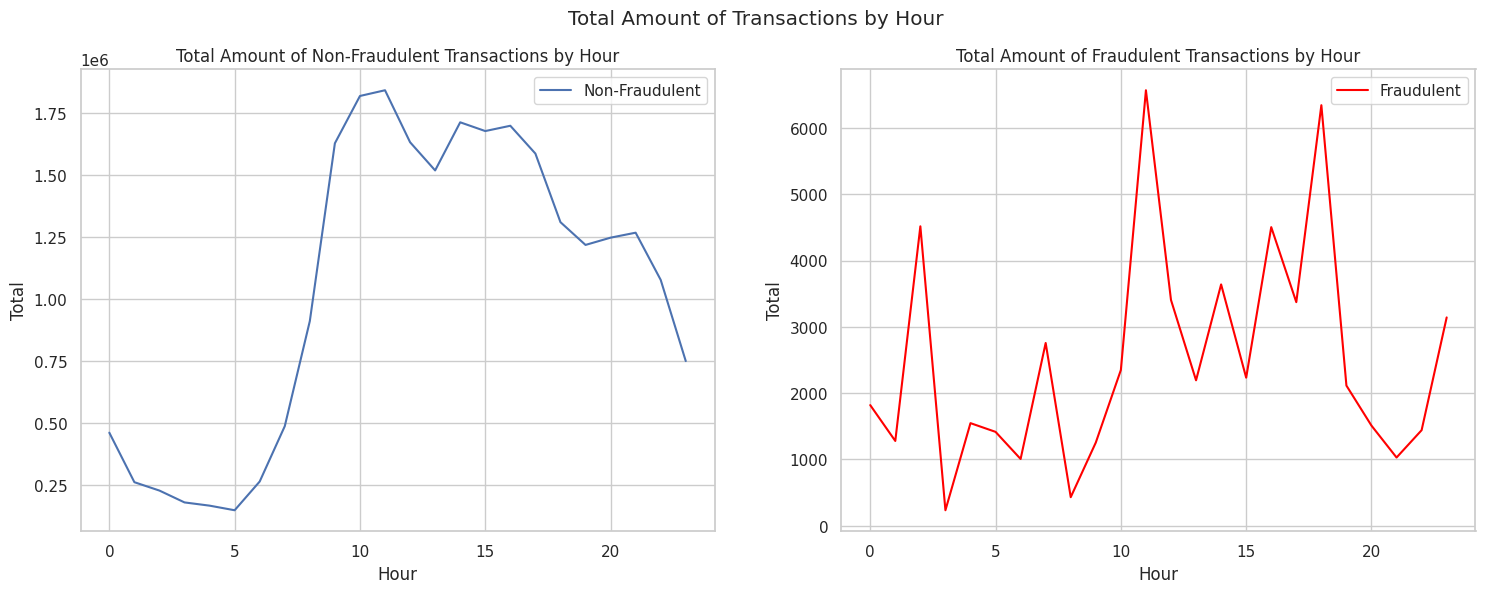

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

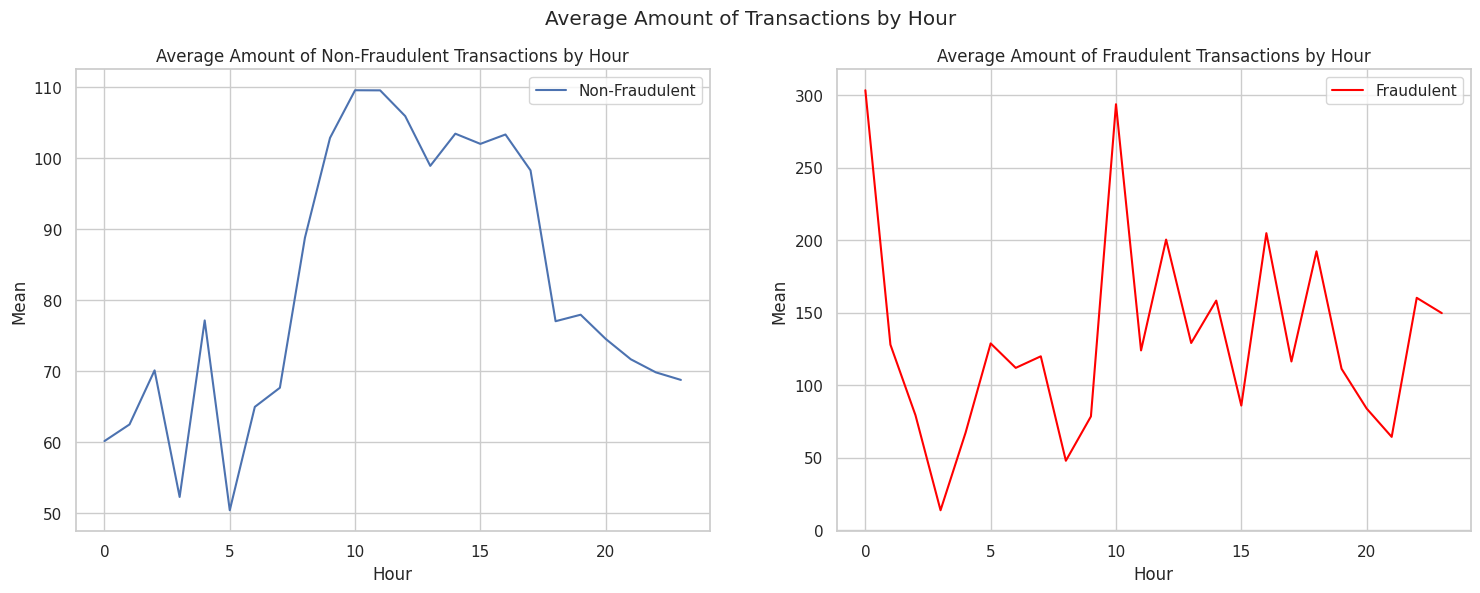

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

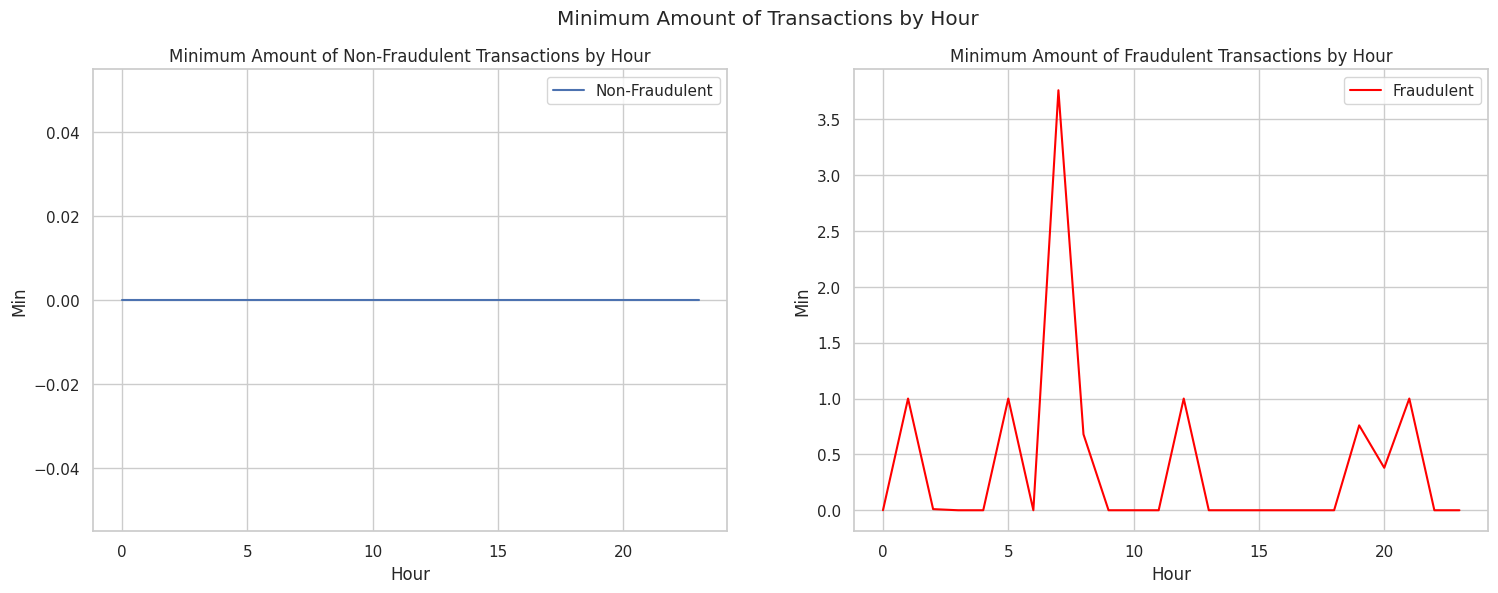

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

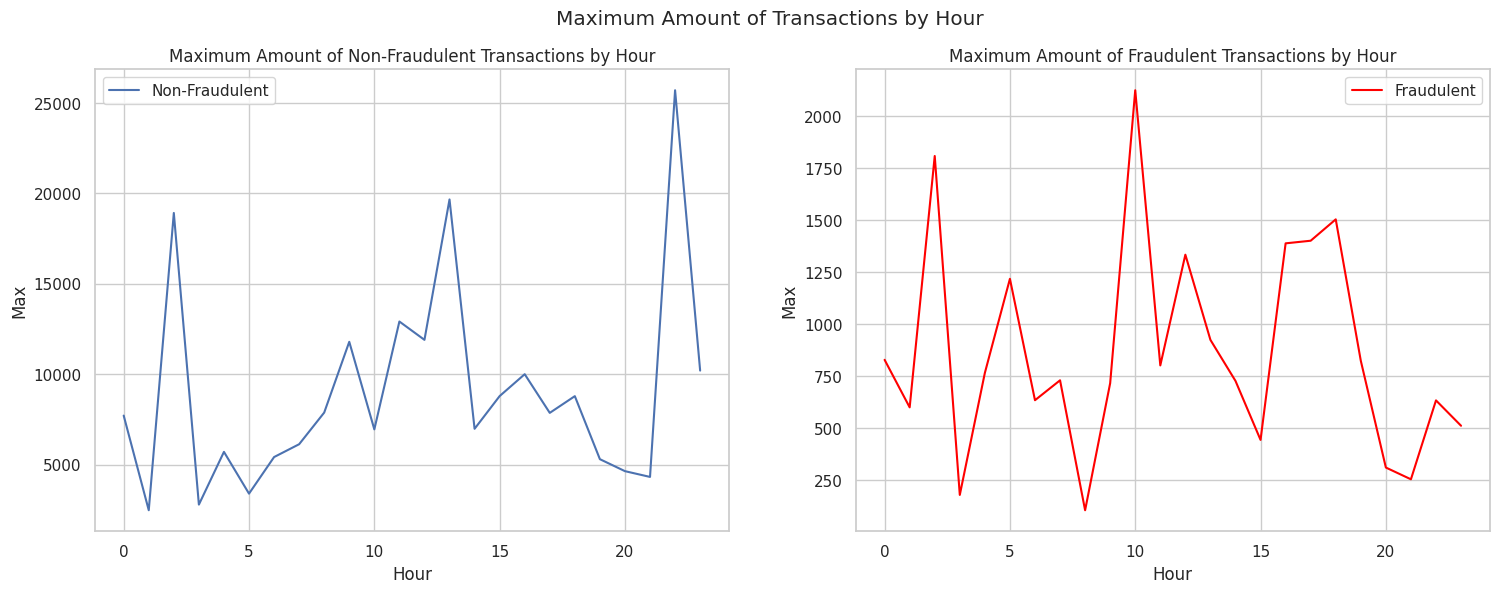

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

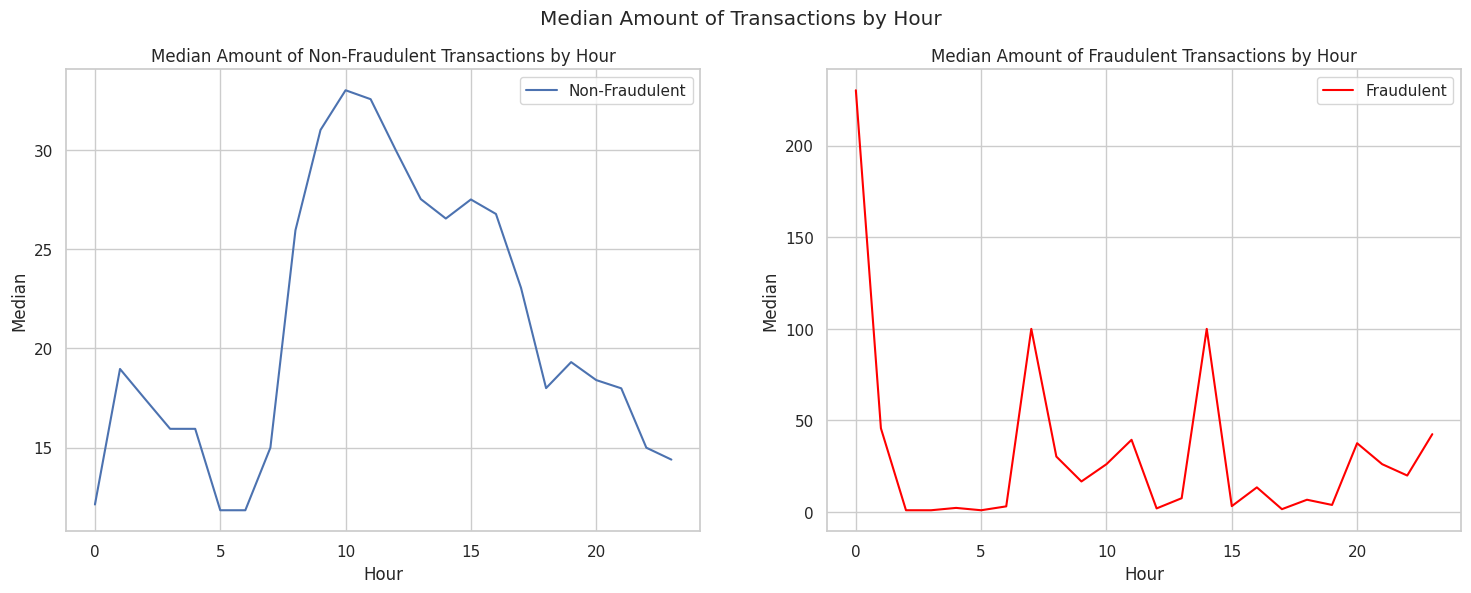

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
sns.set(style="whitegrid")

# Plot Total Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Total', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Total', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Total Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Total Amount of Fraudulent Transactions by Hour')
plt.suptitle('Total Amount of Transactions by Hour')
plt.show()

# Plot Average Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Mean', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Mean', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Average Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Average Amount of Fraudulent Transactions by Hour')
plt.suptitle('Average Amount of Transactions by Hour')
plt.show()

# Plot Minimum Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Min', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Min', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Minimum Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Minimum Amount of Fraudulent Transactions by Hour')
plt.suptitle('Minimum Amount of Transactions by Hour')
plt.show()

# Plot Maximum Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Max', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Max', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Maximum Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Maximum Amount of Fraudulent Transactions by Hour')
plt.suptitle('Maximum Amount of Transactions by Hour')
plt.show()

# Plot Median Amount
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6))
sns.lineplot(ax=ax1, x='Hour', y='Median', data=non_fraudulent_stats, label='Non-Fraudulent')
sns.lineplot(ax=ax2, x='Hour', y='Median', data=fraudulent_stats, label='Fraudulent', color='red')
ax1.set_title('Median Amount of Non-Fraudulent Transactions by Hour')
ax2.set_title('Median Amount of Fraudulent Transactions by Hour')
plt.suptitle('Median Amount of Transactions by Hour')
plt.show()

## Box Plots to Visualize Transaction Amounts for Fraudulent and Non-Fraudulent Transactions

In this section, we use box plots to visualize the distribution of transaction amounts for both fraudulent and non-fraudulent transactions. Box plots are useful for identifying the spread, central tendency, and potential outliers in the data.

### Interpretation
Box plots provide a visual summary of the distribution of transaction amounts for fraudulent and non-fraudulent transactions. By comparing the two plots, we can observe the impact of outliers on the distribution. The plot including outliers shows all data points, while the plot excluding outliers provides a clearer view of the central tendency and spread of the data without the influence of extreme values.

These visualizations help us understand the typical transaction amounts for each class and identify any significant differences between fraudulent and non-fraudulent transactions.

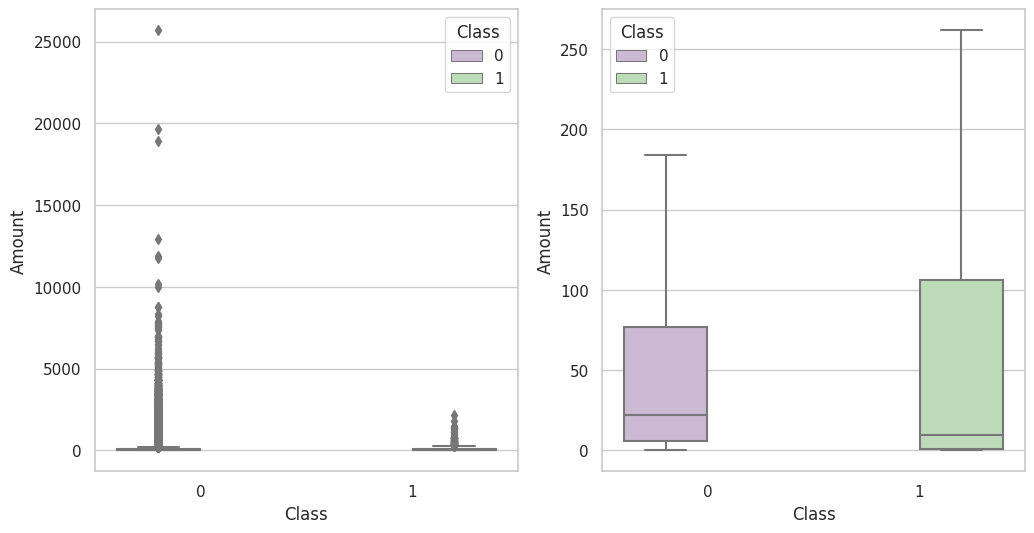

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();




In [55]:
# Create a temporary DataFrame with 'Amount' and 'Class' columns
tmp = df[['Amount', 'Class']].copy()

# Separate the data into non-fraudulent and fraudulent transactions
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

# Display summary statistics
print("Non-Fraudulent Transactions:")
print(class_0.describe())
print("\nFraudulent Transactions:")
print(class_1.describe())

Non-Fraudulent Transactions:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraudulent Transactions:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


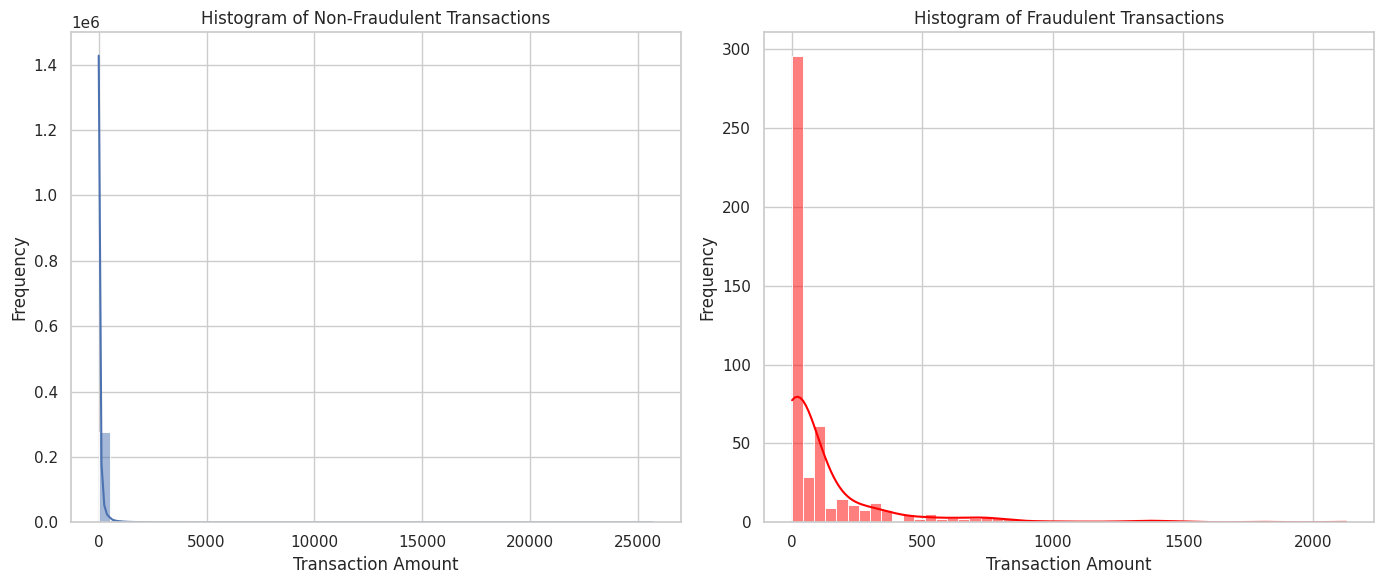

In [56]:
# Plotting histograms
plt.figure(figsize=(14, 6))

# Histogram for non-fraudulent transactions
plt.subplot(1, 2, 1)
sns.histplot(class_0, bins=50, kde=True)
plt.title('Histogram of Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

# Histogram for fraudulent transactions
plt.subplot(1, 2, 2)
sns.histplot(class_1, bins=50, kde=True, color='red')
plt.title('Histogram of Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### The real transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers; fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.

### Let's plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

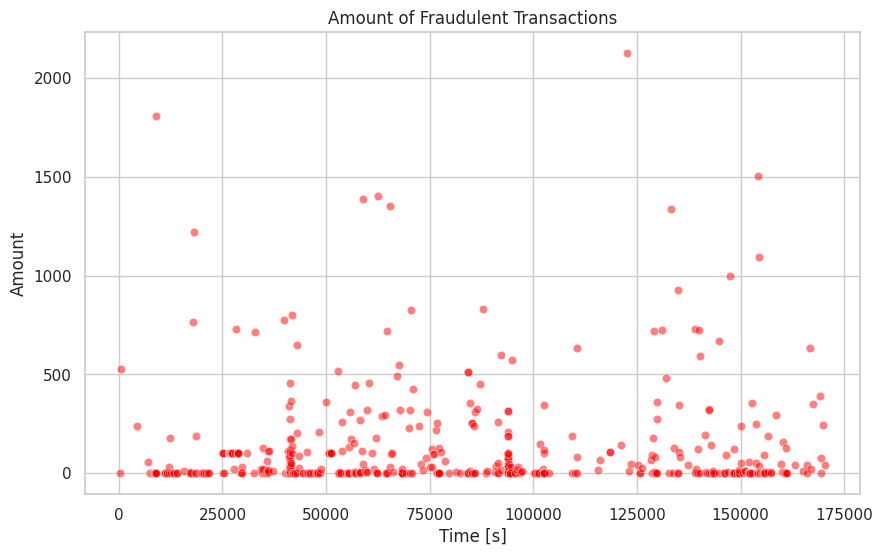

In [58]:
# Filter data for fraudulent transactions
fraud = df.loc[df['Class'] == 1]

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=fraud['Time'], 
    y=fraud['Amount'], 
    color='red', 
    alpha=0.5
)

# Add titles and labels
plt.title('Amount of Fraudulent Transactions')
plt.xlabel('Time [s]')
plt.ylabel('Amount')

# Display the plot
plt.show()


## Correlation Analysis and Visualization for Credit Card Fraud Detection

In this analysis, we examined the relationships between various features (V1-V28) in the credit card fraud detection dataset and the transaction `Amount`. Specifically, we focused on columns that showed notable correlations with `Amount` and `Time` based on the correlation matrix. These columns are V1, V5, V7, and V20.

### Correlation Matrix

To identify the correlated features, we computed the correlation matrix for all features. The correlation matrix helped us understand how different features relate to each other and to the `Amount`.

### Explanation of Selected Columns

#### Direct Correlations with Amount:

##### V20:
The correlation matrix showed a direct correlation between **V20** and **Amount**. This means that as the value of **V20** increases, the transaction **Amount** also tends to increase.

##### V7:
Similarly, **V7** exhibited a direct correlation with **Amount**, indicating that higher values of **V7** are associated with higher transaction amounts.

#### Inverse Correlations with Amount:

##### V1:
The correlation matrix indicated an inverse correlation between **V1** and **Amount**. This means that as the value of **V1** increases, the transaction **Amount** tends to decrease.

##### V5:
Likewise, **V5** showed an inverse correlation with **Amount**, suggesting that higher values of **V5** are associated with lower transaction amounts.

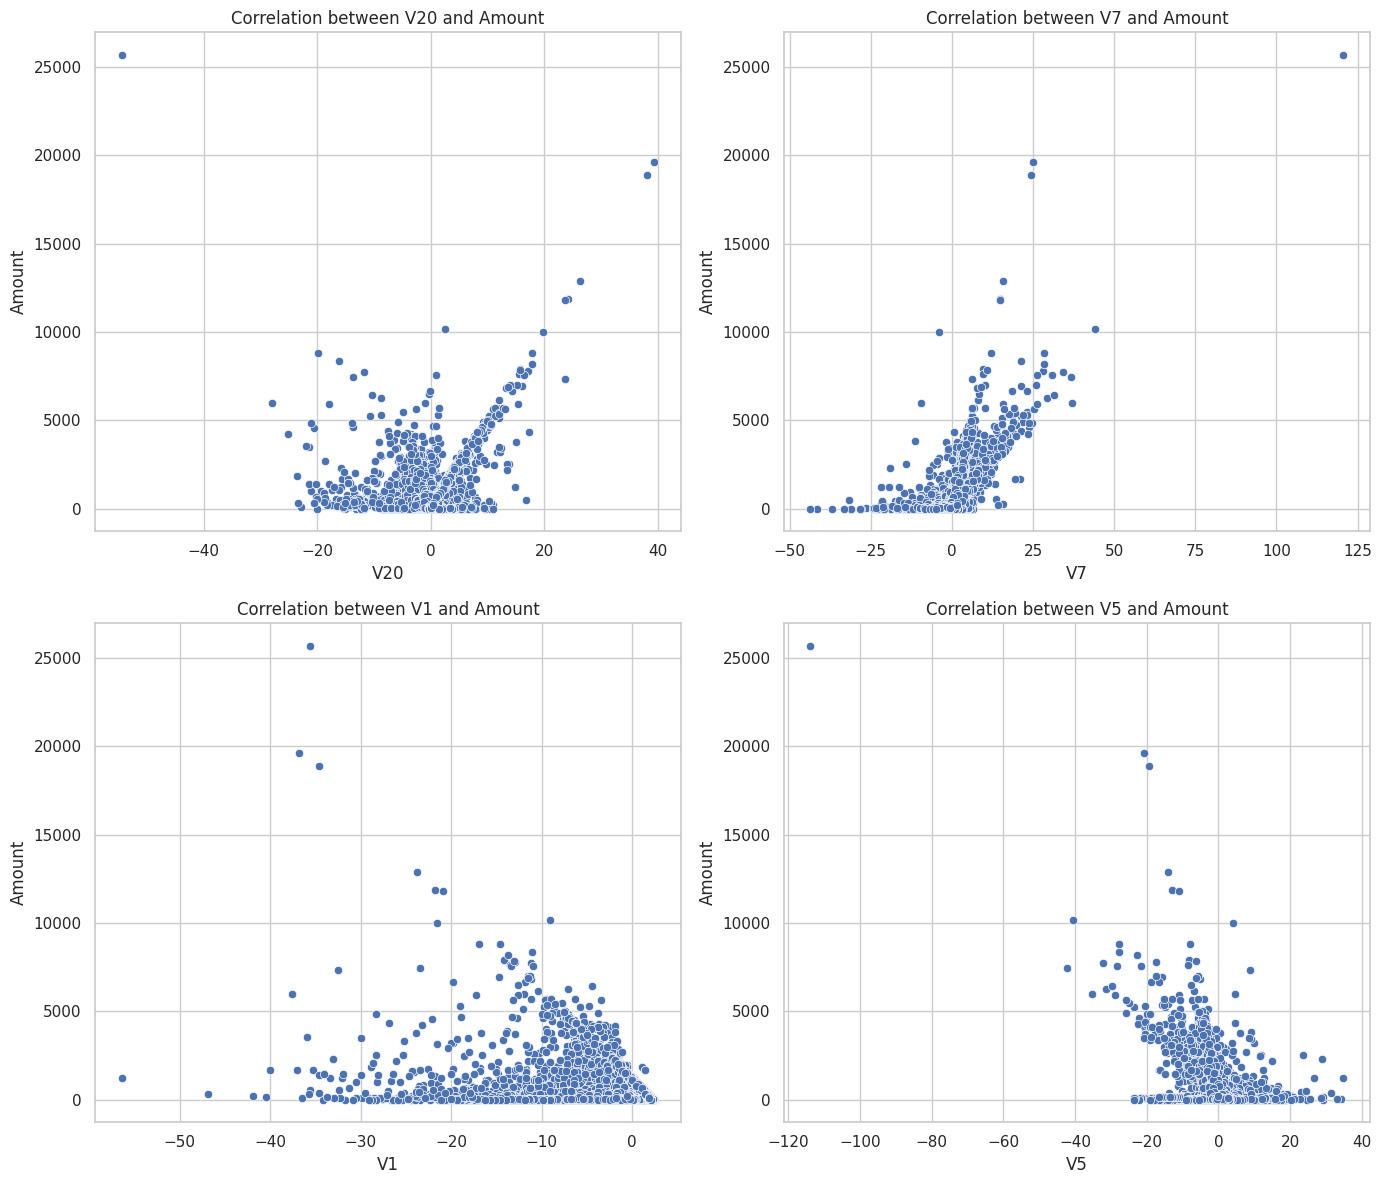

In [70]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Plot the correlations
plt.figure(figsize=(14, 12))

# Plot the correlation between V20 and Amount
plt.subplot(2, 2, 1)
sns.scatterplot(x='V20', y='Amount', data=df)
plt.title('Correlation between V20 and Amount')
plt.xlabel('V20')
plt.ylabel('Amount')

# Plot the correlation between V7 and Amount
plt.subplot(2, 2, 2)
sns.scatterplot(x='V7', y='Amount', data=df)
plt.title('Correlation between V7 and Amount')
plt.xlabel('V7')
plt.ylabel('Amount')

# Plot the correlation between V1 and Amount
plt.subplot(2, 2, 3)
sns.scatterplot(x='V1', y='Amount', data=df)
plt.title('Correlation between V1 and Amount')
plt.xlabel('V1')
plt.ylabel('Amount')

# Plot the correlation between V5 and Amount
plt.subplot(2, 2, 4)
sns.scatterplot(x='V5', y='Amount', data=df)
plt.title('Correlation between V5 and Amount')
plt.xlabel('V5')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

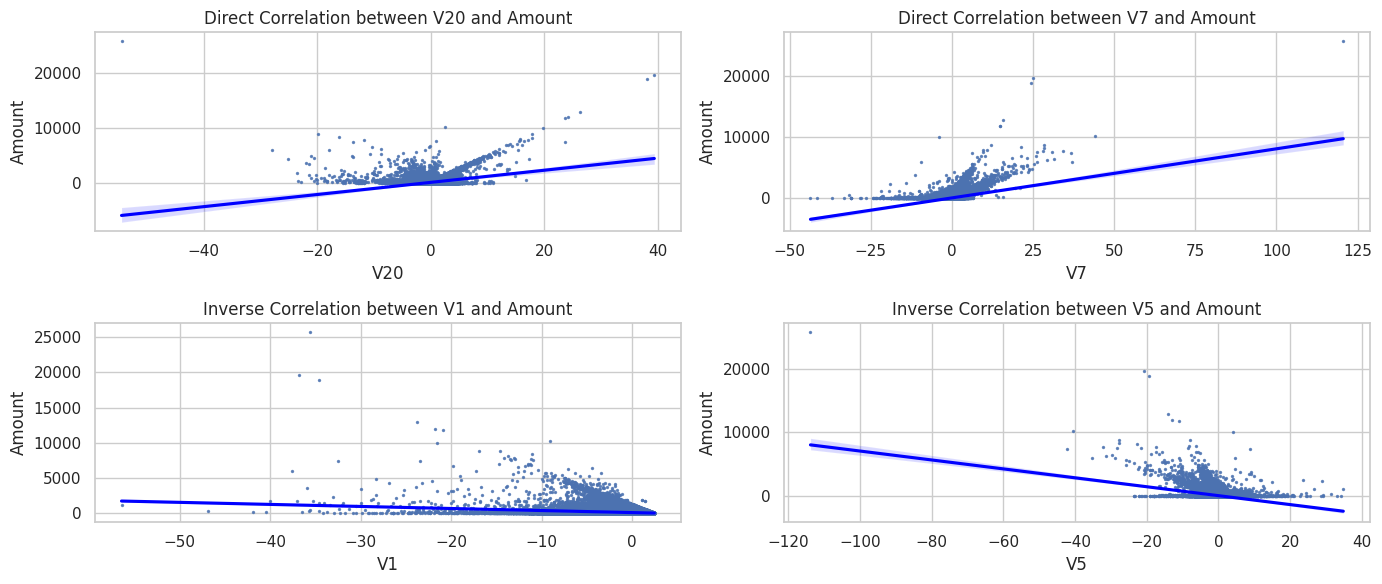

In [68]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Plot the direct correlation between V20 and Amount
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.regplot(x='V20', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Direct Correlation between V20 and Amount')
plt.xlabel('V20')
plt.ylabel('Amount')

# Plot the direct correlation between V7 and Amount
plt.subplot(2, 2, 2)
sns.regplot(x='V7', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Direct Correlation between V7 and Amount')
plt.xlabel('V7')
plt.ylabel('Amount')

# Plot the inverse correlation between V1 and Amount
plt.subplot(2, 2, 3)
sns.regplot(x='V1', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Inverse Correlation between V1 and Amount')
plt.xlabel('V1')
plt.ylabel('Amount')

# Plot the inverse correlation between V5 and Amount
plt.subplot(2, 2, 4)
sns.regplot(x='V5', y='Amount', data=df, scatter_kws={'s':2}, line_kws={'color':'blue'})
plt.title('Inverse Correlation between V5 and Amount')
plt.xlabel('V5')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

## By analyzing the correlation matrix and visualizing the relationships between selected features and the transaction Amount, we identified key features that have significant correlations with Amount. These features (V1, V5, V7, and V20) can provide valuable insights for further analysis and model building in the context of credit card fraud detection.

------